In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Asignación de Masas 

In [22]:
import numpy as np
import random

N = 10  #número de partículas
random.seed(17)

sample = np.arange(0,1,1e-5)

x = random.sample(sample, N)
y = random.sample(sample, N)

x = np.asarray(x)
y = np.asarray(y)

In [138]:
nx = 3 #numero de celdas
ny = 3

xgrid = np.linspace(0,1,nx+1) #posicion de las lineas de nodos
ygrid = np.linspace(0,1,ny+1)

dx = 1./nx
dy = 1./ny

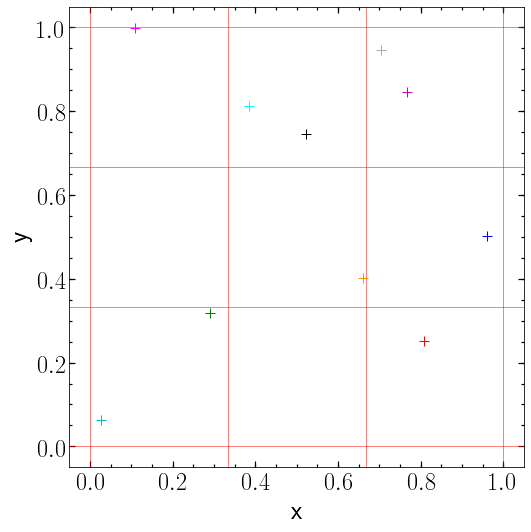

In [121]:
import matplotlib
import matplotlib.pyplot as plt
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


col = ('k', 'r', 'b', 'g','m','darkgray', 'darkorange', 'magenta', 'c', 'cyan')
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
for i in range(nx+1):
    ax.axvline(x = xgrid[i],ls='-', color='r', lw=0.5)
    ax.axhline(y = ygrid[i],ls='-', color='r', lw=0.5)

for i in range(N):
    ax.plot(x[i],y[i],'+k', markersize=10, color = col[i])

ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel('x', fontsize=26)
ax.set_ylabel('y',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## NGP 

In [122]:
nxgrid = np.int_(x*nx)
nygrid = np.int_(y*ny)

print nxgrid, nygrid

h = nxgrid*ny + nygrid 

h = np.int_(h) #esto nos dice a que numero de grid total corresponde cada conjunto nxgrid, ygrid

print h
print h.min(), h.max()


[1 2 2 0 2 2 1 0 0 1] [2 0 1 0 2 2 1 2 0 2]
[5 6 7 0 8 8 4 2 0 5]
0 8


Definimos un vector masas para sumar las masas en cada celda

In [126]:
random.seed(29)
masas = random.sample(sample, N)
masas = np.asarray(masas)*10
print masas

[5.4811 3.4583 8.4485 2.8859 5.1034 3.4381 4.1549 9.7385 1.0373 4.447 ]


Acá sumamos las masas de las particulas de cada celda

In [127]:
count = np.zeros(nx*ny)

for i in range(0,len(h)):
    count[h[i]] = count[h[i]] + masas[i] 

print count

[3.9232 0.     9.7385 0.     4.1549 9.9281 3.4583 8.4485 8.5415]


## CIC 

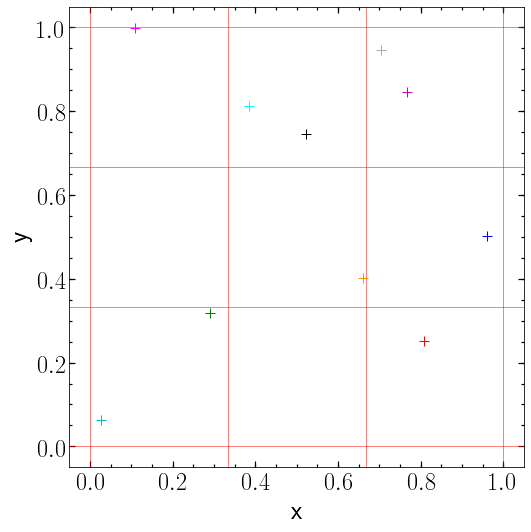

In [128]:
import matplotlib
import matplotlib.pyplot as plt
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


col = ('k', 'r', 'b', 'g','m','darkgray', 'darkorange', 'magenta', 'c', 'cyan')
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
for i in range(nx+1):
    ax.axvline(x = xgrid[i],ls='-', color='r', lw=0.5)
    ax.axhline(y = ygrid[i],ls='-', color='r', lw=0.5)

for i in range(N):
    ax.plot(x[i],y[i],'+k', markersize=10, color = col[i])

ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel('x', fontsize=26)
ax.set_ylabel('y',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [129]:
nxgrid = np.int_(x*nx)
nygrid = np.int_(y*ny)

print nxgrid, nygrid

[1 2 2 0 2 2 1 0 0 1] [2 0 1 0 2 2 1 2 0 2]


In [136]:
distx = np.zeros(N)
disty = np.zeros(N)
sgx = np.zeros(N)
sgy = np.zeros(N)

for i in range(N):
    w = x[i] - xgrid
    distx_aux = abs(w)
    distx[i] = distx_aux.min()
    p = distx_aux.argmin()
    sgx[i] = np.sign(w[p])
print sgx
print distx

print '------------------------------------'

for i in range(N):
    w = y[i] - ygrid
    disty_aux = abs(w)
    disty[i] = disty_aux.min()
    p = disty_aux.argmin()
    sgy[i] = np.sign(w[p])
print sgy
print disty


[-1.  1. -1. -1.  1.  1. -1.  1.  1.  1.]
[0.14468667 0.14002333 0.03951    0.04371333 0.09943333 0.03754333
 0.00528667 0.11016    0.02693    0.05083667]
------------------------------------
[ 1. -1. -1. -1. -1. -1.  1. -1.  1.  1.]
[0.07972333 0.08095333 0.16506667 0.01590333 0.15368    0.05481
 0.06825667 0.00156    0.06219    0.14593333]


In [137]:
masas=np.ones(N)
count = np.zeros([nx,ny])

print count

LX = (distx + dx/2.)/dx
LY = (disty + dy/2.)/dy

for k in range(N):
    
    #region de la particula
    i = np.int(x[k]*nx)
    j = np.int(y[k]*ny)
    count[i,j] = count[i,j] + masas[k] * LX[k] * LY[k]
    
    #lado en x donde no esta la particula
    i = np.int((x[k]-sgx[k]*dx/2.)*nx)
    j = np.int(y[k]*ny)
    count[i,j] = count[i,j] + masas[k] * (1-LX[k]) * LY[k]
    
    #lado en y donde no esta la particula 
    i = np.int(x[k]*nx)
    j = np.int((y[k]-sgy[k]*dy/2.)*ny)
    count[i,j] = count[i,j] + masas[k] * LX[k] * (1-LY[k])

    #diagonal (donde NO esta la particula)
    i = np.int((x[k]-sgx[k]*dx/2.)*nx)
    j = np.int((y[k]-sgy[k]*dy/2.)*ny)
    count[i,j] = count[i,j] + masas[k] * (1-LX[k]) * (1-LY[k])

    

print count

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


IndexError: index 3 is out of bounds for axis 0 with size 3